#  Prediction 

In [1]:
import pandas as pd
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

# Merging CSV for Feature selection 

In [2]:
players_df = pd.read_csv('players.csv')
games_df = pd.read_csv( 'games.csv')  
plays_df =pd.read_csv('plays.csv')
tackles_df = pd.read_csv('tackles.csv')
tracking_week_1_df = pd.read_csv('tracking_week_1.csv')

In [3]:
tackles_df = pd.merge(players_df,tackles_df,on=['nflId'], how='left')
print(tackles_df.shape)

(18309, 13)


In [4]:
final_df = pd.merge(tackles_df, tracking_week_1_df, on=['playId','gameId','nflId'], how='left')
print(final_df.shape)


(109259, 27)


In [5]:
final_df = pd.merge(plays_df,final_df,on=['playId','gameId'], how='left')
print(final_df.shape)

(108837, 60)


In [6]:
final_df.columns

Index(['gameId', 'playId', 'ballCarrierId', 'ballCarrierDisplayName',
       'playDescription', 'quarter', 'down', 'yardsToGo', 'possessionTeam',
       'defensiveTeam', 'yardlineSide', 'yardlineNumber', 'gameClock',
       'preSnapHomeScore', 'preSnapVisitorScore', 'passResult', 'passLength',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult',
       'playNullifiedByPenalty', 'absoluteYardlineNumber', 'offenseFormation',
       'defendersInTheBox', 'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'foulName1', 'foulName2', 'foulNFLId1', 'foulNFLId2', 'nflId', 'height',
       'weight', 'birthDate', 'collegeName', 'position', 'displayName_x',
       'tackle', 'assist', 'forcedFumble', 'pff_missedTackle', 'displayName_y',
       'frameId', 'time', 'jerseyNumber', 'club', 'playDirection', 'x', 'y',
       's', 'a', 'di

# Feature Selection 

In [7]:
final_data = pd.DataFrame()
columns =['yardsToGo','yardlineNumber','passLength','absoluteYardlineNumber','position','playDirection','dis','o','dir','x','y']
final_data[columns] = final_df[columns]
print(final_data)

        yardsToGo  yardlineNumber  passLength  absoluteYardlineNumber  \
0              10              41         6.0                      69   
1              10              34         NaN                      76   
2              10              34         NaN                      76   
3              10              34         NaN                      76   
4              10              34         NaN                      76   
...           ...             ...         ...                     ...   
108832         10              41         NaN                      69   
108833         10              34         NaN                      44   
108834         10              34         NaN                      44   
108835          1              17         NaN                      27   
108836          1              17         NaN                      27   

       position playDirection   dis       o     dir      x      y  
0            FS           NaN   NaN     NaN     NaN    

# Label Encoding for categorical features 

In [8]:
label_encoder = LabelEncoder()
# Fit and transform the categorical column
final_data['position'] = label_encoder.fit_transform(final_data['position'])

In [9]:
final_data['playDirection'] = label_encoder.fit_transform(final_data['playDirection'])

In [10]:
final_data.rename(columns={'x': 'cord1', 'y': 'cord2'}, inplace=True)# Renaming X&Y and cord1 , cord2

In [11]:
final_data=final_data.dropna()   # droping Null values 
final_data = final_data.reset_index(drop=True)

In [12]:
final_data

,yardsToGo,yardlineNumber,passLength,absoluteYardlineNumber,position,playDirection,dis,o,dir,cord1,cord2
0,5,30,11.0,40,4,1,0.20,267.13,279.69,57.89,26.88
1,5,30,11.0,40,4,1,0.27,270.92,283.11,57.63,26.95
2,5,30,11.0,40,4,1,0.33,272.04,287.08,57.32,27.05
3,5,30,11.0,40,4,1,0.40,272.04,292.74,56.95,27.20
4,5,30,11.0,40,4,1,0.44,272.65,296.43,56.56,27.40
...,...,...,...,...,...,...,...,...,...,...,...
26832,10,30,0.0,40,4,1,0.34,0.30,358.37,41.94,18.59
26833,10,30,0.0,40,4,1,0.29,353.56,356.64,41.93,18.88
26834,10,30,0.0,40,4,1,0.24,2.14,357.57,41.92,19.12
26835,10,30,0.0,40,4,1,0.18,3.66,357.42,41.91,19.30


# Predicting CORD1(X)

In [13]:
X = final_data.iloc[:,0:-2].values  #defining X & Y 
y = final_data.iloc[:,-2].values

In [14]:
scaler=StandardScaler()   #Standard scaling of features & target variable 
X = scaler.fit_transform(X)    

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #spliting X & Y 

In [16]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)    #model fitting / training 

RandomForestRegressor(random_state=42)

In [17]:
prediction_X = rf_regressor.predict(X_test) #here prediction_X is X coordinate of location  

In [18]:
# checking error values
mae = mean_absolute_error(y_test, prediction_X)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, prediction_X)
print(f'Mean Square Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Square Error: {rmse}')
r2 = r2_score(y_test, prediction_X)
print(f'R2 score: {r2}')
medae = median_absolute_error(y_test, prediction_X)
print(f'Median Absolute Error: {medae}')

Mean Absolute Error: 0.6482049552906105
Mean Square Error: 1.5738107079955272
Root Mean Square Error: 1.2545161250440455
R2 score: 0.9969178589540111
Median Absolute Error: 0.29964999999999975


In [19]:
mse,rmse,mae,r2,medae

(1.5738107079955272,
 1.2545161250440455,
 0.6482049552906105,
 0.9969178589540111,
 0.29964999999999975)

# Predicting cord2(Y)

In [20]:
data=final_data.copy()  #creating copy of final_data as data 

In [21]:
X_pred = rf_regressor.predict(X)  

In [22]:
data['cord1_pred']=X_pred   #adding prediction X variable to dataframe 

In [23]:
data

,yardsToGo,yardlineNumber,passLength,absoluteYardlineNumber,position,playDirection,dis,o,dir,cord1,cord2,cord1_pred
0,5,30,11.0,40,4,1,0.20,267.13,279.69,57.89,26.88,57.3630
1,5,30,11.0,40,4,1,0.27,270.92,283.11,57.63,26.95,57.4642
2,5,30,11.0,40,4,1,0.33,272.04,287.08,57.32,27.05,57.2313
3,5,30,11.0,40,4,1,0.40,272.04,292.74,56.95,27.20,56.8971
4,5,30,11.0,40,4,1,0.44,272.65,296.43,56.56,27.40,56.4795
...,...,...,...,...,...,...,...,...,...,...,...,...
26832,10,30,0.0,40,4,1,0.34,0.30,358.37,41.94,18.59,45.2524
26833,10,30,0.0,40,4,1,0.29,353.56,356.64,41.93,18.88,42.0175
26834,10,30,0.0,40,4,1,0.24,2.14,357.57,41.92,19.12,43.5075
26835,10,30,0.0,40,4,1,0.18,3.66,357.42,41.91,19.30,43.2551


In [24]:
y1=data.iloc[:,-2].values    #fetching  Features and target variable 
X1=data.iloc[:,0:10].values
scaler=StandardScaler()
X1 = scaler.fit_transform(X1)  #Standard scaling of X & Y  
y1 = y.reshape(-1, 1)
y1= scaler.fit_transform(y1)

In [25]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)   #spiliting of X & Y 

In [26]:
rf_regressor1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor1.fit(X_train1, y_train1)    #fitting/training of model 

C:\Users\sharmashailza\AppData\Local\Temp\ipykernel_16868\2519255089.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor1.fit(X_train1, y_train1)    #fitting/training of model


RandomForestRegressor(random_state=42)

In [27]:
prediction_Y = rf_regressor1.predict(X_test1)    #Here prediction_Y is Y coordinate of location 

In [28]:
# checking error values
mae1 = mean_absolute_error(y_test1, prediction_Y)
print(f'Mean Absolute Error: {mae1}')
mse1 = mean_squared_error(y_test1, prediction_Y)
print(f'Mean Square Error: {mse1}')
rmse1 = np.sqrt(mse1)
print(f'Root Mean Square Error: {rmse1}')
r22 = r2_score(y_test1, prediction_Y)
print(f'R2 score: {r22}')
medae1 = median_absolute_error(y_test1, prediction_Y)
print(f'Median Absolute Error: {medae1}')

Mean Absolute Error: 0.0001592267338749513
Mean Square Error: 2.678394820412893e-07
Root Mean Square Error: 0.000517532107256438
R2 score: 0.9999997400661597
Median Absolute Error: 7.187467201519304e-05


# Prediction of Tackle Time 

In [29]:
#Loading required file 
data=pd.read_csv('time.csv')

In [30]:
data=data.dropna()    #droping null values 
data = data.reset_index(drop=True)

In [31]:
print(data['time'].describe())

count                           1849
unique                          1134
top       2022-09-11 14:45:07.799999
freq                               3
Name: time, dtype: object


In [32]:
# Convert 'gameClock' to datetime
data['gameClock'] = pd.to_datetime(data['gameClock'], format='%M:%S')

# Convert datetime to seconds (or milliseconds)
data['gameClock_seconds'] = data['gameClock'].dt.second + data['gameClock'].dt.minute * 60
# # If you want milliseconds, multiply by 1000
# df['gameClock_milliseconds'] = df['gameClock_seconds'] * 1000



In [33]:
data = data.drop('height', axis=1)    #dropping irrelevant fetures 
data = data.drop('gameClock', axis=1)

In [34]:
# Convert 'time' to datetime
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S.%f')

# Convert datetime to numerical format (seconds)
data['time_seconds'] = data['time'].dt.minute * 60 + data['time'].dt.second + data['time'].dt.microsecond / 1e6


In [35]:
label_encoder = LabelEncoder()
# Fit and transform the categorical column
data['position'] = label_encoder.fit_transform(data['position'])
data['passResult'] = label_encoder.fit_transform(data['passResult'])

In [36]:
df=data.copy()

In [37]:
x=df.iloc[:,0:11]
x['gameClock_seconds']=df.iloc[:,-2]     #fetching features and target variables 
y=df.iloc[:,-1]

In [38]:
scaler=StandardScaler()
x = scaler.fit_transform(x)      #standard scaling of X & Y 
y = y.values.reshape(-1, 1)
y = scaler.fit_transform(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

In [39]:
# checking error values
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, predictions)
print(f'Mean Square Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Square Error: {rmse}')
r2 = r2_score(y_test, predictions)
print(f'R2 score: {r2}')
medae = median_absolute_error(y_test, predictions)
print(f'Median Absolute Error: {medae}')

Mean Absolute Error: 0.627613643447309
Mean Square Error: 0.6273631314349452
Root Mean Square Error: 0.7920625805041829
R2 score: 0.37384682770900945
Median Absolute Error: 0.5448715526001249


# Analysis

In [40]:
def convert_height_to_meters(height):
    # Split the height into feet and inches
    feet, inches = map(int, height.split('-'))
    # Convert height to inches
    total_inches = feet * 12 + inches
    # Convert inches to cm (1 inch = 2.54 cm)
    height_cm = total_inches * 2.54
    # Convert cm to meters
    height_m = height_cm / 100
    return height_m

players_df['height_m'] = players_df['height'].apply(convert_height_to_meters)
players_df.sample(4)

,nflId,height,weight,birthDate,collegeName,position,displayName,height_m
984,48723,6-3,261,1995-05-26,Iowa,TE,Parker Hesse,1.9050
1250,53459,6-7,253,NaN,Miami,DE,Gregory Rousseau,2.0066
1046,52469,6-0,200,1998-09-03,Louisiana State,CB,Kristian Fulton,1.8288
1269,53480,6-5,295,NaN,Texas,T,Samuel Cosmi,1.9558


In [41]:
players_df['weight_kg'] = players_df['weight'] * 0.45359237
players_df.sample(4)

,nflId,height,weight,birthDate,collegeName,position,displayName,height_m,weight_kg
598,46111,6-6,252,1995-10-03,Penn State,TE,Mike Gesicki,1.9812,114.305277
24,36785,6-8,330,1985-10-27,Texas State,T,Ty Nsekhe,2.0320,149.685482
725,46527,6-3,235,1996-09-19,Washington State,ILB,Frankie Luvu,1.9050,106.594207
1549,54580,5-11,195,NaN,Pittsburgh,CB,Damarri Mathis,1.8034,88.450512


In [42]:
players_df['bmi'] = players_df['weight_kg'] / players_df['height_m']**2
players_df.sample(5)

,nflId,height,weight,birthDate,collegeName,position,displayName,height_m,weight_kg,bmi
595,46106,6-6,315,1996-03-25,Auburn,T,Braden Smith,1.9812,142.881597,36.401531
226,42410,6-3,325,1991-10-03,South Carolina,G,A.J. Cann,1.9050,147.417520,40.621798
117,40494,5-8,178,1992-01-17,Southern California,CB,Nickell Robey,1.7272,80.739442,27.064530
175,41707,6-4,325,1991-07-08,Utah State,C,Tyler Larsen,1.9304,147.417520,39.559836
1134,52603,6-5,290,1995-11-27,Wake Forest,T,Justin Herron,1.9558,131.541787,34.388628


# merging players dataframe and tackles dataframe

In [43]:
merged_df = pd.merge(players_df, tackles_df, on='nflId', how='inner')
print(merged_df.shape)
merged_df.head()

(18309, 22)


,nflId,height_x,weight_x,birthDate_x,collegeName_x,position_x,displayName_x,height_m,weight_kg,bmi,...,birthDate_y,collegeName_y,position_y,displayName_y,gameId,playId,tackle,assist,forcedFumble,pff_missedTackle
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,1.9304,102.058283,27.387579,...,1977-08-03,Michigan,QB,Tom Brady,NaN,NaN,NaN,NaN,NaN,NaN
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,1.9304,148.778297,39.925004,...,1982-01-22,Arkansas,T,Jason Peters,NaN,NaN,NaN,NaN,NaN,NaN
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,1.8796,102.058283,28.887994,...,1983-12-02,California,QB,Aaron Rodgers,NaN,NaN,NaN,NaN,NaN,NaN
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis,1.9812,121.109163,30.854631,...,1984-05-19,UCLA,TE,Marcedes Lewis,NaN,NaN,NaN,NaN,NaN,NaN
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan,1.9304,98.429544,26.413798,...,1985-05-17,Boston College,QB,Matt Ryan,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Drop the 'playId' column
merged_df = merged_df.drop(columns=['playId'])

# Group by 'nflId' and sum the performance metrics
grouped_df = merged_df.groupby('nflId').agg({'tackle': 'sum', 'assist': 'sum', 'forcedFumble': 'sum', 'pff_missedTackle': 'sum'})

# Reset the index
grouped_df = grouped_df.reset_index()
print(grouped_df.shape)
grouped_df.head()


(1683, 5)


,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,25511,0.0,0.0,0.0,0.0
1,29550,0.0,0.0,0.0,0.0
2,29851,0.0,0.0,0.0,0.0
3,30842,0.0,0.0,0.0,0.0
4,33084,0.0,0.0,0.0,0.0


In [45]:
name_df = players_df[['nflId', 'displayName', 'collegeName', 'position' , 'bmi']].drop_duplicates()

final_df = pd.merge(grouped_df, name_df, on='nflId', how='left')
final_df.head()

,nflId,tackle,assist,forcedFumble,pff_missedTackle,displayName,collegeName,position,bmi
0,25511,0.0,0.0,0.0,0.0,Tom Brady,Michigan,QB,27.387579
1,29550,0.0,0.0,0.0,0.0,Jason Peters,Arkansas,T,39.925004
2,29851,0.0,0.0,0.0,0.0,Aaron Rodgers,California,QB,28.887994
3,30842,0.0,0.0,0.0,0.0,Marcedes Lewis,UCLA,TE,30.854631
4,33084,0.0,0.0,0.0,0.0,Matt Ryan,Boston College,QB,26.413798


In [46]:
# Calculate the correlation
correlation_tackles = final_df['bmi'].corr(final_df['tackle'])
correlation_assists = final_df['bmi'].corr(final_df['assist'])

print(f"The correlation between BMI and successful tackles is {correlation_tackles}")
print(f"The correlation between BMI and assists is {correlation_assists}")

The correlation between BMI and successful tackles is -0.1739402282187437
The correlation between BMI and assists is -0.005314702092892604


# BMI analysis

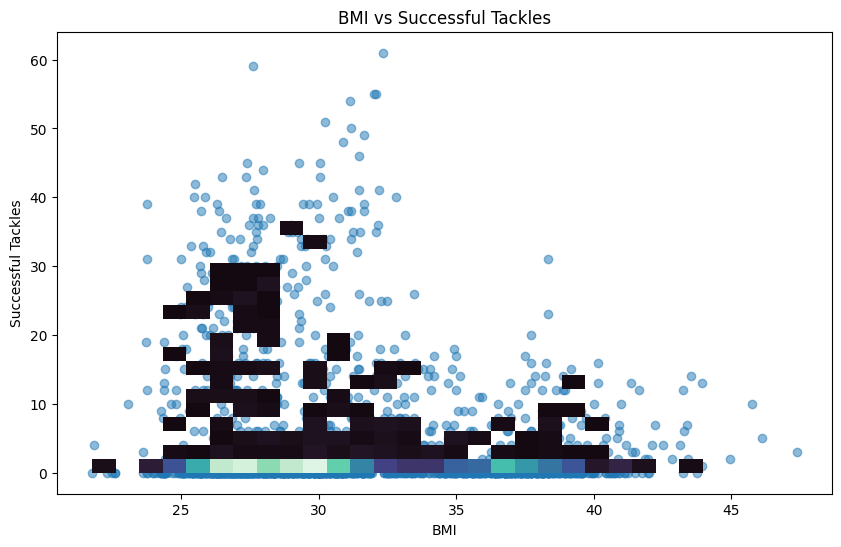

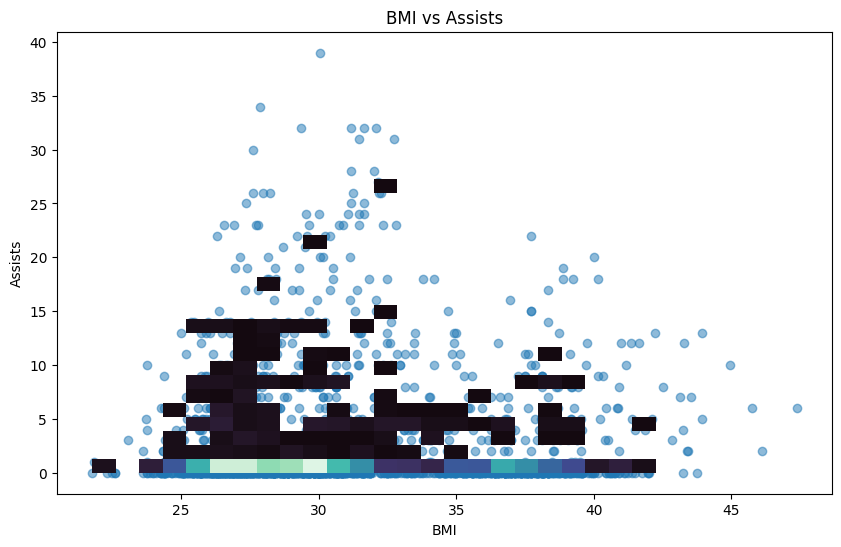

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(final_df['bmi'], final_df['tackle'], alpha=0.5)
sns.histplot(final_df, x="bmi", y="tackle", bins=30, pthresh=.1, cmap="mako")
plt.title('BMI vs Successful Tackles')
plt.xlabel('BMI')
plt.ylabel('Successful Tackles')
plt.show()

# Create a scatter plot for BMI vs assists
plt.figure(figsize=(10, 6))
plt.scatter(final_df['bmi'], final_df['assist'], alpha=0.5)
sns.histplot(final_df, x="bmi", y="assist", bins=30, pthresh=.1, cmap="mako")
plt.title('BMI vs Assists')
plt.xlabel('BMI')
plt.ylabel('Assists')
plt.show()

# Top 10 players who missed the tackle 

In [48]:
# Sort the dataframe by 'pff_missedTackle' in descending order and take the top 10
top_missed_tacklers = final_df.sort_values('pff_missedTackle', ascending=False).head(10)
top_missed_tacklers.head(10)

,nflId,tackle,assist,forcedFumble,pff_missedTackle,displayName,collegeName,position,bmi
1479,54502,34.0,20.0,0.0,19.0,Jalen Pitre,Baylor,FS,27.124598
483,44926,35.0,17.0,0.0,16.0,Rayshawn Jenkins,Miami,SS,29.025203
1237,53445,39.0,24.0,1.0,13.0,Zaven Collins,Tulsa,OLB,31.647869
865,47913,43.0,20.0,0.0,13.0,Drue Tranquill,Notre Dame,ILB,30.043514
901,47996,41.0,13.0,1.0,13.0,Donovan Wilson,Texas A&amp;M,SS,27.667090
694,46304,55.0,28.0,0.0,12.0,Zaire Franklin,Syracuse,OLB,32.007026
725,46527,33.0,11.0,1.0,12.0,Frankie Luvu,Washington State,ILB,29.372685
1469,54492,34.0,32.0,0.0,12.0,Devin Lloyd,Utah,ILB,29.372685
433,44848,44.0,26.0,1.0,11.0,Budda Baker,Washington,SS,27.979300
1487,54513,37.0,14.0,0.0,11.0,Jaquan Brisker,Penn State,SS,26.650414


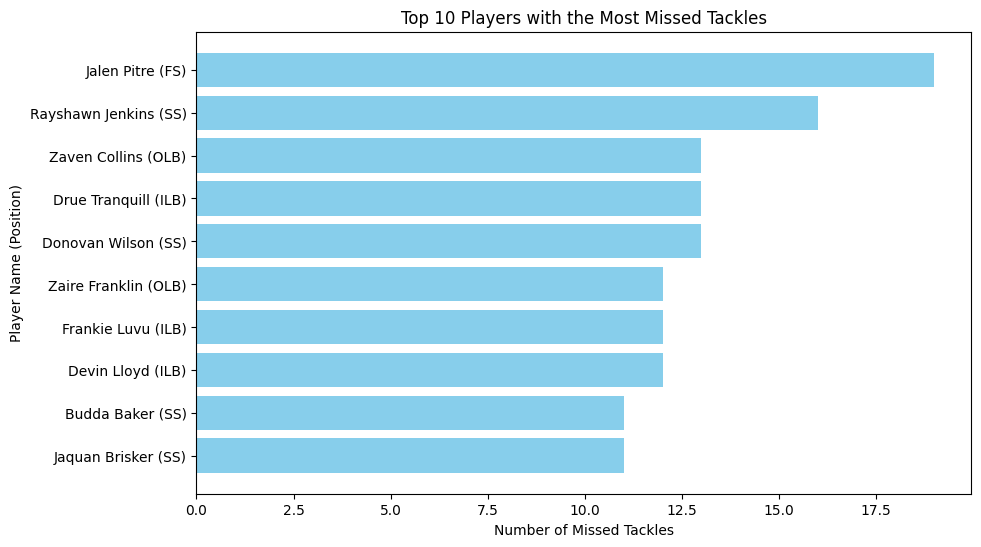

In [49]:
top_missed_tacklers['name_and_position'] = top_missed_tacklers['displayName'] + ' (' + top_missed_tacklers['position'] + ')'

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_missed_tacklers['name_and_position'], top_missed_tacklers['pff_missedTackle'], color='skyblue')
plt.xlabel('Number of Missed Tackles')
plt.ylabel('Player Name (Position)')
plt.title('Top 10 Players with the Most Missed Tackles')
plt.gca().invert_yaxis()  # Invert y-axis to have the player with the most missed tackles at the top
plt.show()